In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.integrate import quad

#Constants
G  = 6.6743e-11 #m^2 kg^-1 s^-2
Me = 5.972e24 #kg
Mm = 7.35e22 #kg
Re = 6.3781e6 #m
Rm = 1.7381e6 #m
wm = 7.272e-5 #rad/s

# Part 1

In [57]:
# constants
alpha = 0
g = 9.81 #m/s

h = 4e3 #m

#question 1
fft = np.sqrt(2.*h/g) #free fall time
print(f"Algebraic solution for free fall time: {fft} seconds")

Algebraic solution for free fall time: 28.55686245854129 seconds


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-04  1.100e-03  1.110e-02  1.111e-01
             1.111e+00  1.111e+01  3.000e+01]
        y: [[ 0.000e+00 -4.905e-08 ... -6.056e+02 -4.414e+03]
            [ 0.000e+00 -9.810e-04 ... -1.090e+02 -2.943e+02]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x000001F71F2B75C0>
 t_events: [array([ 2.856e+01])]
 y_events: [array([[-4.000e+03, -2.801e+02]])]
     nfev: 44
     njev: 0
      nlu: 0
Numerical solution for free fall time: 28.556862458541303 seconds
Difference between the numerical solution and symbolic solution 1.4210854715202004e-14 seconds


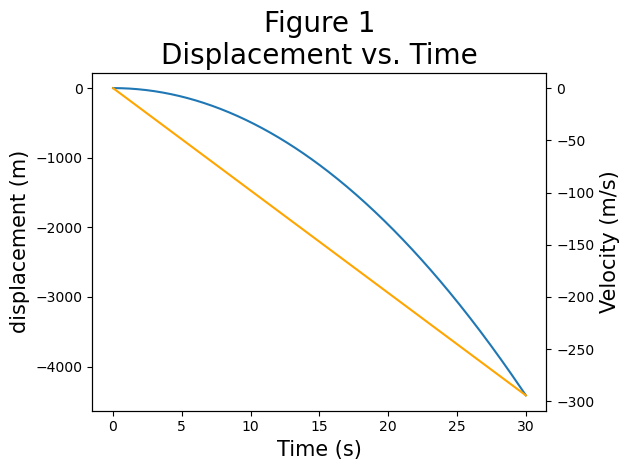

In [61]:
# Questions 2-4

def der(t, s):
    '''
    Function which computes the position and velocity of a test mass falling in constant gravity with no other forces
    '''
    y = s[0]
    yDot = s[1]
    dydt = yDot
    dyDotdt = -g
    return (dydt, dyDotdt)

def event(t,s):
    '''Helper function which is zero when the test mass reaches the bottom of the mineshaft
    '''
    return s[0]+h

s0 = (0, 0)

soln = solve_ivp(der, t_span=(0,30), y0=s0, events=event, dense_output=True)
print(soln) #reminder for what information the differential equation solution contains
print(f"Numerical solution for free fall time: {soln.t_events[0][0]} seconds")
print(f"Difference between the numerical solution and symbolic solution {soln.t_events[0][0]-fft} seconds")

fig, ax = plt.subplots(1,1)
ts = np.linspace(0, 30, 400)
solution = soln.sol(ts)
ax.plot(ts, solution[0], label="position")
ax.set_xlabel("Time (s)", fontsize=15)
ax.set_ylabel("displacement (m)", fontsize=15)
ax.set_title("Figure 1\nDisplacement vs. Time", fontsize=20)
ax2 = ax.twinx()
ax2.plot(ts, solution[1], color="orange", label="velocity")
ax2.set_ylabel("Velocity (m/s)", fontsize=15);
fig.tight_layout()

# Part 2


Time it takes to fall to the bottom of the mine with no drag: 28.57565908679822 seconds
Difference between fall times with linear gravity and constant gravity: 0.0014935577933670174 seconds


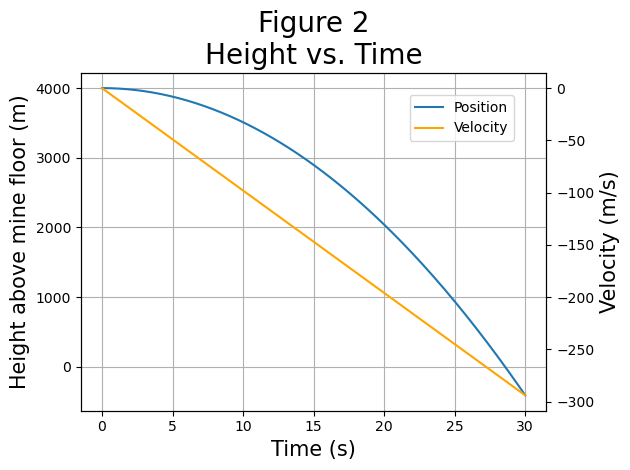

In [64]:
#question 1

g0= G*Me/Re**2 #m/s^2
#The calculated value of g is used from here on out instead of the measured value of g, since it is more useful to consider the Earth as a perfect sphere
#and when we start changing things like the density distribution of the Earth, it is helpful to use a value of g which is a simple case of the more complicated mass distributions
rMine = Re-h #meters

def g(r):
    '''Function that gives the gravitational acceleration experienced in the Earth modled as having uniform density at distance r<Re from the center'''
    return g0*r/Re

def der(t,s, alpha, gamma):
    '''Derivative function for an object falling in an Earth with uniform density experiencing a drag.
       The drag coefficient is alpha, and the power scaling of drag relative to speed is gamma
    '''
    y = s[0]
    yDot = s[1]
    yDdot = -g(s[0]) - alpha*np.abs((yDot)**gamma)*np.sign(yDot) #make sure drag always points opposite direcion of motion
    return np.array((yDot, yDdot))

def event(t, s, alpha, gamma):
    '''Helper function for finding when the mass reaches the bottom of the well in coordinates where the Earth's center is the origin'''
    return s[0]-rMine

tSpan = (0,30)
ts = np.linspace(tSpan[0],tSpan[1],200)
yi = (Re, 0)

soln = solve_ivp(der, t_span = tSpan, t_eval = ts, args=(0, 2), y0 = yi, events=event)
fft = np.sqrt(2.*h/g0) #recalculate the theoretical free fall time using the calculated value of g0
print(f"Time it takes to fall to the bottom of the mine with no drag: {soln.t_events[0][0]} seconds")
print(f"Difference between fall times with linear gravity and constant gravity: {soln.t_events[0][0]-fft} seconds")
fig, ax = plt.subplots(1,1)
ax.plot(soln.t, soln.y[0]-rMine, label="Position")
ax.grid()
ax.set_xlabel("Time (s)", fontsize=15)
ax.set_ylabel("Height above mine floor (m)", fontsize=15)
ax.set_title("Figure 2\nHeight vs. Time", fontsize=20)
ax2 = ax.twinx()
ax2.plot(soln.t, soln.y[1], label="Velocity", color="orange")
fig.legend(loc = (0.65, 0.7))
ax2.set_ylabel("Velocity (m/s)", fontsize=15)
fig.tight_layout()

Question 2: <br>
If the radius dependance of gravity is taken into effect, then the object will accelerate slightly slower than if we assumed a constant gravity, as some amount of the Earth's mass is now outside the object and is no longer accerating the object towards the center of the Earth. Since the depth of the mine is less than 1% the radius fo the Earth, the effect is essentially negigable, and only changes the time at which the object impacts the floor of the mine by 0.02 seconds.

Time it takes to hit the ground with drag and changing gravity: 83.359530872868 seconds
Difference between theoretical solution with no drag and constant gravity: 54.785365343863155 seconds


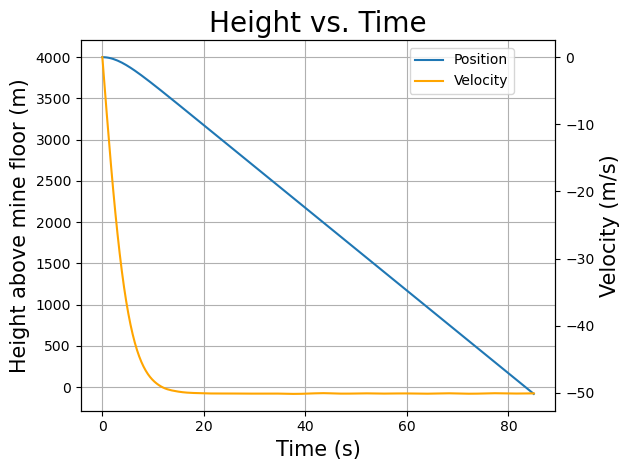

In [65]:
#Question 3
tSpan = (0,85)
ts = np.linspace(tSpan[0],tSpan[1],200)
yi = (Re, 0)

soln = solve_ivp(der, t_span = tSpan, t_eval = ts, args=(0.0039, 2), y0 = yi, events=event)
#alpha was found to be 0.0039 by seeing what value gets the terminal speed to be closest to 50 m/s
print(f"Time it takes to hit the ground with drag and changing gravity: {soln.t_events[0][0]} seconds")
print(f"Difference between theoretical solution with no drag and constant gravity: {soln.t_events[0][0]-fft} seconds")

fig, ax = plt.subplots(1,1)
ax.plot(soln.t, soln.y[0]-rMine, label="Position")
ax.grid()
ax.set_xlabel("Time (s)", fontsize=15)
ax.set_ylabel("Height above mine floor (m)", fontsize=15)
ax.set_title("Height vs. Time", fontsize=20)
ax2 = ax.twinx()
ax2.plot(soln.t, soln.y[1], label="Velocity", color="orange")
fig.legend(loc = (0.65, 0.8))
ax2.set_ylabel("Velocity (m/s)", fontsize=15)
fig.tight_layout()

Including a drag term increases the fall time significantly, since at some point, the object will no longer be able to accelerate any more. For this plot, I found a drag coefficent which makes the terminal velocity 50 m/s which corresponds to a drag coefficient of $\alpha=0.0039$.

# Part 3

Time it takes to collide with the wall: 21.915951144661822 seconds and would fall 2352.9161693900824 meters in that time
Time it takes to reach the bottom: 28.575679655174927 seconds


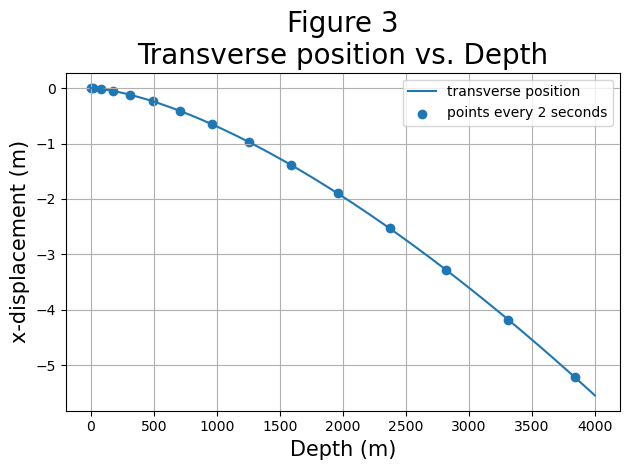

In [81]:
def derC(t,s, alpha, gamma, omega):
    '''Derivatives function which takes varying gravity, drag, and the coriolis effect into account'''
    x, y, z = s[0:3]
    xDot, yDot, zDot = s[3:6]
    a_cx = 2*omega*yDot
    a_dx = -alpha*np.abs((xDot)**gamma)*np.sign(xDot) #make sure drag always points opposite to velocity
    a_cy = -2*omega*xDot
    a_gy = -g(s[1])
    a_dy = -alpha*np.abs((yDot)**gamma)*np.sign(yDot) 

    xDdot = a_cx
    yDdot = a_gy + a_dy + a_cy
    zDdot = 0
    return np.array((xDot, yDot, zDot, xDdot, yDdot, zDdot))

def event(t, s, alpha, gamma, omega):
    '''Helper function for finding when the test mass hits the ground'''
    return s[1]-rMine

tSpan = (0,30)
tEval = np.linspace(tSpan[0], tSpan[1], 50)
s0 = (0,Re,0,0,0,0)

soln = solve_ivp(derC, t_span = tSpan, t_eval = tEval, y0=s0, args = (0, 2,wm), dense_output=True, events=[event,(lambda t, s, a, g, o: s[0]+2.5)])#solve_ivp(derC, t_span = tSpan, t_eval = tEval, y0=s0, args = (0.0039, 2,wm), dense_output=True, events=event)
t_hit = soln.t_events[0][0]
print(f"Time it takes to collide with the wall: {soln.t_events[1][0]} seconds and would fall {Re-soln.sol(soln.t_events[1][0])[1]} meters in that time\nTime it takes to reach the bottom: {t_hit} seconds")
fig, ax = plt.subplots(1,1)
time_dense = np.linspace(tSpan[0],t_hit, 300) 
ax.plot(Re-soln.sol(time_dense)[1], soln.sol(time_dense)[0], label="transverse position")
timePoints = np.arange(tSpan[0], t_hit, 2)
ax.scatter(Re-soln.sol(timePoints)[1], soln.sol(timePoints)[0], label="points every 2 seconds")
ax.set_xlabel("Depth (m)", fontsize=15)
ax.set_ylabel("x-displacement (m)", fontsize=15)
ax.set_title("Figure 3\nTransverse position vs. Depth", fontsize=20)
ax.legend()
ax.grid()
fig.tight_layout()

For figure 3, which assumes no drag, the particle would hit the wall of the mineshaft before it hits the bottom, since our particle would move over 5 meters from its starting position assuming it can go through matter, and it would only have to move 2.5 meters to hit the wall of our 5 meter diameter mineshaft. In reality, it would probably still hit the bottom, but likely only in pieces after ricocheting off the wall multiple times.

Time it takes to collide with the wall: 29.56243459071956 seconds and would fall 1304.0355029748753 meters in that time
Time it takes to reach the bottom: 83.36131420484261 seconds


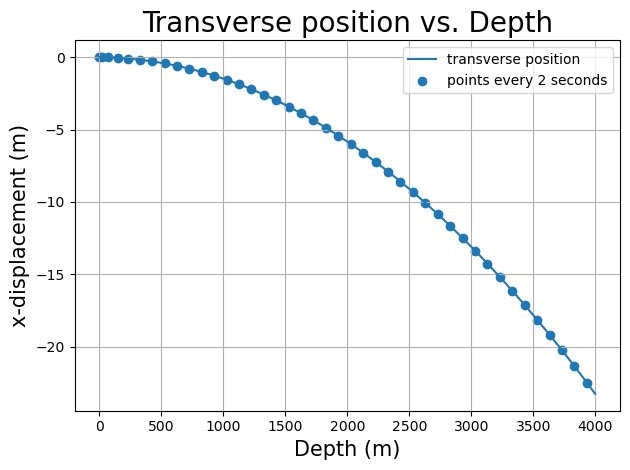

In [82]:
tSpan = (0,100)
tEval = np.linspace(tSpan[0], tSpan[1], 50)
s0 = (0,Re,0,0,0,0)

soln = solve_ivp(derC, t_span = tSpan, t_eval = tEval, y0=s0, args = (0.0039, 2,wm), dense_output=True, events=[event,(lambda t, s, a, g, o: s[0]+2.5)])
t_hit = soln.t_events[0][0]

print(f"Time it takes to collide with the wall: {soln.t_events[1][0]} seconds and would fall {Re-soln.sol(soln.t_events[1][0])[1]} meters in that time\nTime it takes to reach the bottom: {t_hit} seconds")

fig, ax = plt.subplots(1,1)
time_dense = np.linspace(tSpan[0],t_hit, 300) 
ax.plot(Re-soln.sol(time_dense)[1], soln.sol(time_dense)[0], label="transverse position")
timePoints = np.arange(tSpan[0], t_hit, 2)
ax.scatter(Re-soln.sol(timePoints)[1], soln.sol(timePoints)[0], label="points every 2 seconds")
ax.set_xlabel("Depth (m)", fontsize=15)
ax.set_ylabel("x-displacement (m)", fontsize=15)
ax.set_title("Transverse position vs. Depth", fontsize=20)
ax.legend()
ax.grid()
fig.tight_layout()

If you had drag, you would move a further distance from the center of the mineshaft (assuming you could move through the walls of the shaft), as you would spend much more time falling and so the tangential velocity you got from the coriolis force would have more time to build up. This means that while you would still hit the wall, you wouldn't have gone as far into the mine before hitting the side.

# Part 4

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  8.008e+00 ...  7.992e+03  8.000e+03]
        y: [[ 6.378e+06  6.378e+06 ... -5.655e+06 -5.625e+06]
            [ 0.000e+00 -7.846e+01 ...  3.656e+03  3.726e+03]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x000001F71FEA2C00>
 t_events: [array([ 2.527e+03,  2.542e+03,  7.597e+03,  7.611e+03]), array([ 1.267e+03,  3.802e+03,  6.337e+03])]
 y_events: [array([[-6.378e+06, -7.071e+01],
                  [-6.378e+06,  7.071e+01],
                  [-6.378e+06, -7.071e+01],
                  [-6.378e+06,  7.071e+01]]), array([[ 5.675e-10, -7.905e+03],
                  [-1.062e-09,  7.905e+03],
                  [ 1.128e-09, -7.905e+03]])]
     nfev: 1682
     njev: 0
      nlu: 0
Time it takes to reach the center of the Earth: 1267.3427999165972 seconds
Speed that the object has at the center of the Earth: 7905.277129564457 m/s
Time it takes 

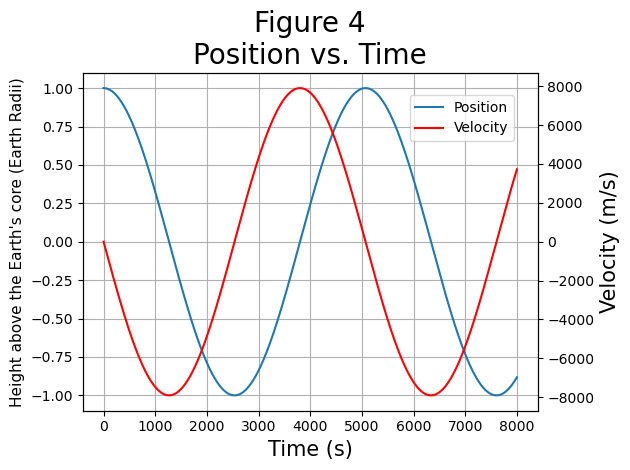

In [71]:

def der(t, s):
    '''Derivative function for an infinite mine assuming a constant density Earth, no drag, and no coriolis force'''
    y = s[0]
    yDot = s[1]
    yDDot = -g(np.abs(y))*np.sign(y)

    return (yDot, yDDot)

def otherSide(t,s):
    '''
        Helper function to find when the mass gets to the other side of the Earth.
        The 0.99996 is because if you use the exact radius of the Earth, it spends an infintesimal amount of time at that position.
        Also, values closer to 1 than 0.99996 seem to suffer from some lack of precision on my machine so that it doesn't find the first time reaching the opposing side,
        but does somehow find the second time the mass reaches the opposing side.
    '''
    return s[0]+Re*0.99996
    
def middle(t,s):
    '''Helper function to find when the mass reaches the center of the Earth'''
    return s[0]

tSpan = (0,8000)
ts = np.linspace(tSpan[0],tSpan[1], 1000)
s0 = (Re, 0)

soln = solve_ivp(der, t_span=tSpan, t_eval=ts, y0=s0, dense_output=True, events=[otherSide, middle], rtol=1e-10)
print(soln)

center = soln.t_events[1][0]
centerSpeed = np.abs(soln.sol(center)[1])
otherSide=soln.t_events[0][0]

print(f"Time it takes to reach the center of the Earth: {center} seconds")
print(f"Speed that the object has at the center of the Earth: {centerSpeed} m/s")
print(f"Time it takes to reach the other side of the Earth: {otherSide} seconds")


denseT = np.linspace(tSpan[0],tSpan[1],500)

fig, ax = plt.subplots(1,1)
ax.plot(denseT, soln.sol(denseT)[0]/Re, label="Position")
ax2 = ax.twinx()
ax2.plot(denseT, soln.sol(denseT)[1], color="red", label="Velocity")
ax2.set_ylabel("Velocity (m/s)", fontsize=15)
ax.set_xlabel("Time (s)", fontsize=15)
ax.set_ylabel("Height above the Earth's core (Earth Radii)", fontsize=11)
ax.set_title("Figure 4\nPosition vs. Time", fontsize=20)
ax.grid()
fig.legend(loc=(0.65,0.7))
fig.tight_layout()

## Figure 4

This figure shows that assuming uniform density, no drag and no coriolis force, the object will oscillate back and forth between the sides of the Earth such that it will fall throughout the Earth, turn around at the opposite surface, and fall back towards where it came from. It appears to do this in a sinusoidal manner.

Time it takes to reach the center of the Earth: 1267.3427999165972 seconds
Speed that the object has at the center of the Earth: 7905.277129564457 m/s
Time it takes to reach the other side of the Earth: 7603.605347353328 seconds

In [73]:
vOrbit = np.sqrt(G*Me/Re)
print(f"Speed required to orbit the Earth at the Earth's radius: {vOrbit} m/s")
print(f"Difference in speed between falling to the center of the Earth from its surface and orbiting the Earth at the Earth's radius {vOrbit-centerSpeed} m/s")

period = 2*np.pi*Re/vOrbit
print(f"\nTime it takes to orbit around the Earth at the Earth's radius: {period} seconds")
print(f"Time it takes fo fall to the other side of the Earth: {otherSide} seconds")
print(f"Ratio of the time it takes to orbit aroudnd the Earth to the time it takes to fall through the Earth: {period/otherSide} seconds")

print(f"\n\nNumber of meters below the surface  {Re-Re*0.99996}")

Speed required to orbit the Earth at the Earth's radius: 7905.277129890415 m/s
Difference in speed between falling to the center of the Earth from its surface and orbiting the Earth at the Earth's radius 3.259583536419086e-07 m/s

Time it takes to orbit around the Earth at the Earth's radius: 5069.371199675785 seconds
Time it takes fo fall to the other side of the Earth: 2527.469205818407 seconds
Ratio of the time it takes to orbit aroudnd the Earth to the time it takes to fall through the Earth: 2.0057103714679276 seconds


Number of meters below the surface  255.1239999998361


The speed of the object as it goes through the center of the Earth is equal to speed that the object would have to go at to orbit around the Earth at the Earth's radius.

The orbital period of the object at the Earth's radius is twice that of the time it takes to fall from one side of the planet to the other side.

# Part 5

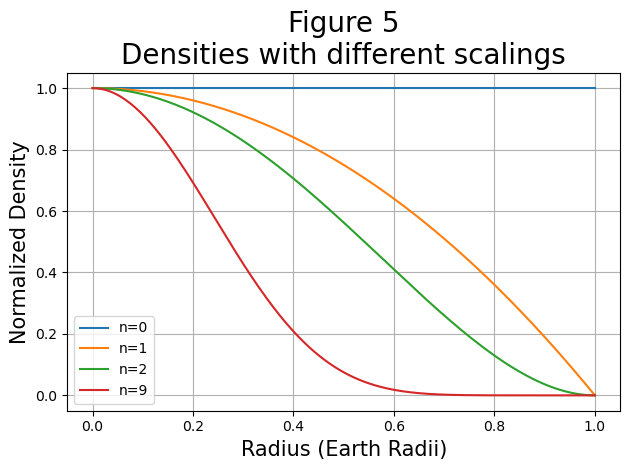

In [75]:
def rho(r, Rho0, N):
    '''Function to find the density at a certain radius from the center of the Earth'''
    return Rho0*(1-r**2/Re**2)**N

def dM(r, Rho0, N):
    '''Helper function to aid in integrating the density to find the mass of the density distribution'''
    return 4*np.pi * r**2 * rho(r, Rho0,N)

def M(r, Rho0, N):
    '''Function to calculate the total mass of the density distribution'''
    return quad(dM, 0, r,args=(Rho0, N))[0]

rs = np.linspace(1, Re,200)

ns = [0, 1, 2, 9]
fig, ax = plt.subplots(1,1)
for n in ns:
    ax.plot(rs/Re, rho(rs, 1, n), label=f"n={n}")
ax.set_xlabel("Radius (Earth Radii)", fontsize=15)
ax.set_ylabel("Normalized Density", fontsize=15)
ax.set_title("Figure 5\nDensities with different scalings", fontsize=20)
ax.grid()
ax.legend()
fig.tight_layout()

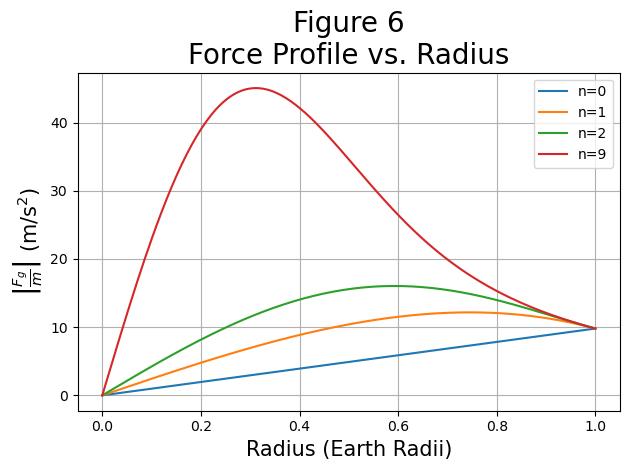

In [77]:
fig, ax = plt.subplots(1,1)
for n in ns:
    Mass = M(Re, 1, n)
    rho0=Me/Mass #normaize the density distributions so that each planet has the same total mass: the mass of the Earth.
    aS = np.zeros_like(rs)
    for i in range(len(rs)):
        aS[i] = G*M(rs[i],rho0,n)/rs[i]**2
    ax.plot(rs/Re, aS, label=f"n={n}")
ax.legend()
ax.set_title("Figure 6\nForce Profile vs. Radius", fontsize=20)
ax.set_xlabel("Radius (Earth Radii)", fontsize=15)
ax.set_ylabel("$\\left|\\frac{F_g}{m}\\right|$ (m/s$^2$)", fontsize=15)
ax.grid()
fig.tight_layout()

Time to core for n=0: 1267.2409534601404 seconds
Speed it is going at the core for n=0: 7905.971248072887
Time to core for n=1: 1096.89148200254 seconds
Speed it is going at the core for n=1: 10435.238778034789
Time to core for n=2: 1035.138775425471 seconds
Speed it is going at the core for n=2: 12200.745609087588
Time to core for n=9: 943.8748065601621 seconds
Speed it is going at the core for n=9: 18391.9968315182


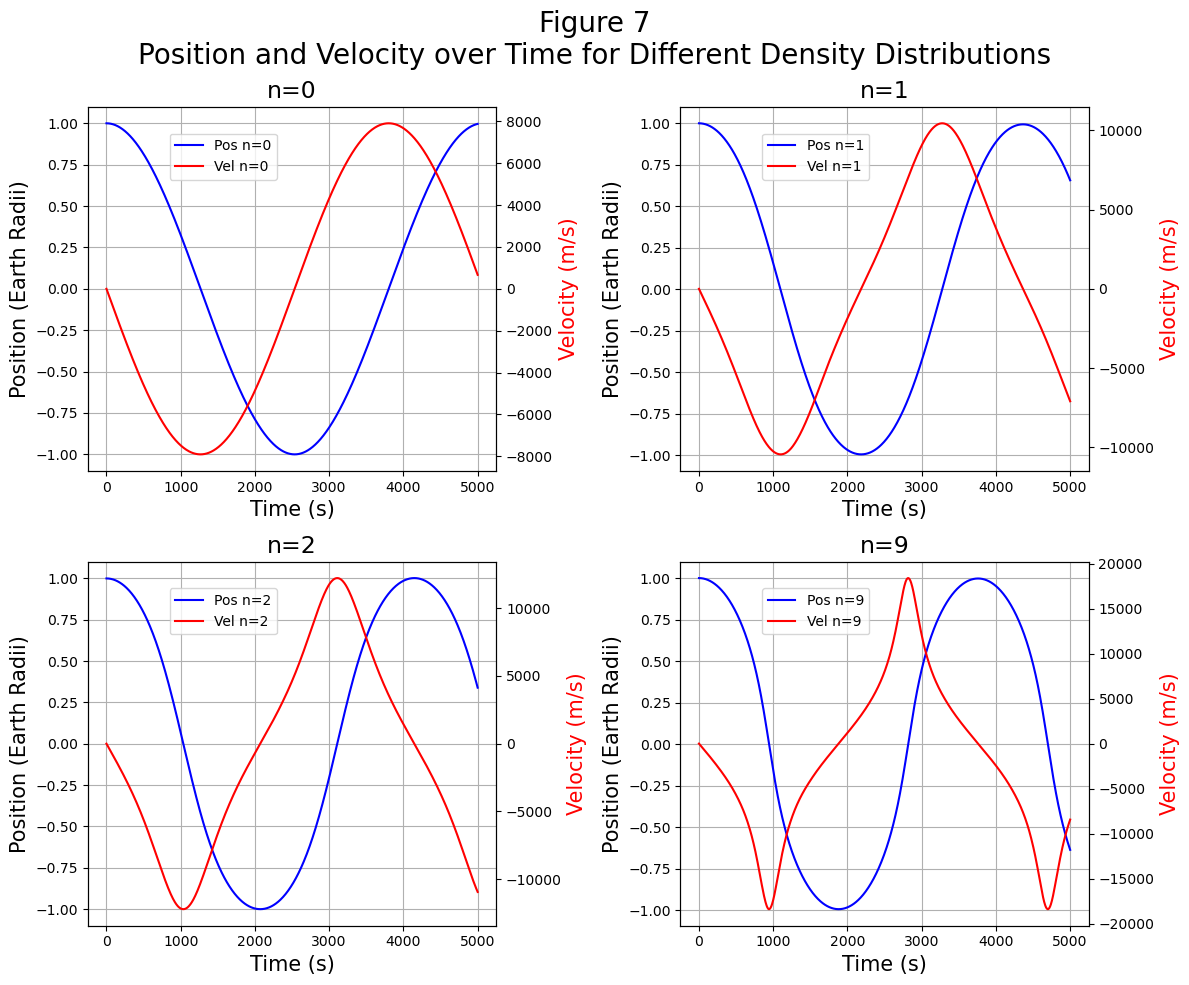

In [79]:
def der(t, s, Rho0, N):
    '''
        Derivative function to calculate how the mass will fall through an infinite hole in a planet with a given density distribution.
        We are assuming that coriolis force and drag force can be neglected.
    '''
    y = s[0]
    yDot = s[1]
    yDDot = -np.sign(y)*G*M(np.abs(y), Rho0, N)/np.abs(y)**2
    return np.array((yDot, yDDot))

def event(t, s, Rho0, N):
    return s[0]
    
fig, axs = plt.subplots(2,2, figsize=(12,10))
axs = axs.flatten()
tSpan = (0,5000)
ts = np.linspace(tSpan[0],tSpan[1],200)
s0 = (Re, 0)
denseTs = np.linspace(tSpan[0], tSpan[1],1000)
for i in range(len(ns)):
    ax = axs[i]
    ax2 = ax.twinx()
    rho0 = Me/M(Re, 1, ns[i])
    soln = solve_ivp(der,t_span=tSpan, t_eval=ts, y0=s0, dense_output=True, args=(rho0, ns[i]), events=event)
    print(f"Time to core for n={ns[i]}: {soln.t_events[0][0]} seconds")
    print(f"Speed it is going at the core for n={ns[i]}: {np.abs(soln.y_events[0][0][1])}")
    ax.plot(denseTs, soln.sol(denseTs)[0]/Re, label=f"Pos n={ns[i]}", color="blue")
    ax.plot([],[],color="red", label=f"Vel n={ns[i]}") #hack to get both labels on the legend
    ax.set_title(f"n={ns[i]}", fontsize=17)
    ax.set_xlabel("Time (s)", fontsize=15)
    ax.set_ylabel("Position (Earth Radii)", fontsize=15)
    ax2.set_ylabel("Velocity (m/s)", color="red", fontsize=15)
    ax.grid()
    ax.legend(loc=(0.2,0.8))
    ax2.plot(denseTs, soln.sol(denseTs)[1], label=f"Vel n={ns[i]}", color="red")
fig.suptitle("Figure 7\nPosition and Velocity over Time for Different Density Distributions", fontsize=20)
fig.tight_layout()

Time to core for n=0: 1267.2409534601404 seconds<br>
Speed it is going at the core for n=0: 7905.971248072887

Time to core for n=1: 1096.89148200254 seconds<br>
Speed it is going at the core for n=1: 10435.238778034789

Time to core for n=2: 1035.138775425471 seconds<br>
Speed it is going at the core for n=2: 12200.745609087588

Time to core for n=9: 943.8748065601621 seconds<br>
Speed it is going at the core for n=9: 18391.9968315182

# Part 6

In [40]:
g0_m = G*Mm/Rm**2 #m/s^2
def der(t, s):
    '''Derivative function to describe how a mass would fall through an infinitely long hole in the moon, assuming no coriolis and constant density'''
    y = s[0]
    yDot = s[1]
    yDdot = -np.sign(y)*np.abs(g0_m*y/Rm)
    return np.array((yDot, yDdot))

def event(t, s):
    '''Helper function to find when we reach the center of the moon.'''
    return s[0]

tSpan=(0,10000)
ts = np.linspace(tSpan[0],tSpan[1],500)
s0=(Rm, 0)

soln = solve_ivp(der, t_span=tSpan, t_eval=ts, y0=s0, events=event)

print(f"Time it takes to fall to the center of the moon: {soln.t_events[0][0]} seconds")

densityM = Mm/(4/3*np.pi*Rm**3)
densityE = Me/(4/3*np.pi*Re**3)
print(f"The density of the Moon is {densityM/densityE} times that of the Earth's density")

Time it takes to fall to the center of the moon: 1624.9059919736462 seconds
The density of the Moon is 0.6081591337511927 times that of the Earth's density


$\frac{d^2y}{dt^2}=-g_0\frac{y}{R}\implies y(t)=Y_0\cos(\omega t)+V_0\sin(\omega t),\omega=\sqrt{\frac{g_0}{R}}$<br>
If $V_0=0$ and $y(0)=Y_0$, then $y(t)=0$ when $\omega t=\frac{\pi}{2}\implies t=\sqrt{\frac{\pi^2R}{4g_0}}$<br>
$g_0=G\frac{\rho4\pi R^3}{3R^2}=G\frac{4\rho\pi R}{3}$<br>
$t_{\text{center}}=\sqrt{\frac{\pi^2R}{4G\frac{4\rho\pi R}{3}}}=\sqrt{\frac{3\pi}{16G\rho}}$

Theoretical time it takes to fall to the center of the Moon: 1625.1201867414668 seconds
Theoretical time it takes to fall to the center of the Earth: 1267.342799918946 seconds


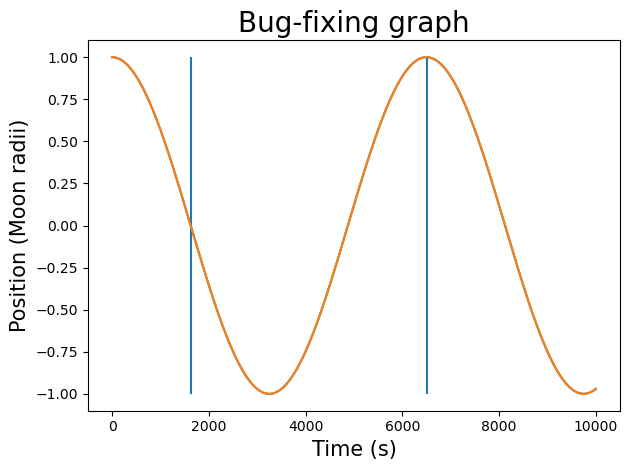

In [45]:
print(f"Theoretical time it takes to fall to the center of the Moon: {np.sqrt(3*np.pi/(16*G*densityM))} seconds")
print(f"Theoretical time it takes to fall to the center of the Earth: {np.sqrt(3*np.pi/(16*G*densityE))} seconds")


omega = np.sqrt(g0_m/Rm)

fig, ax = plt.subplots(1,1) #graph I made to help myself find where I had a typo, not part of the actual lab
ax.plot(soln.t,soln.y[0]/Rm)
#ax.vlines(np.sqrt(3*np.pi/(16*G*densityM*np.pi)),-1,1)
ax.vlines(2*np.pi/omega,-1,1)
ax.vlines(np.sqrt(3*np.pi/(16*G*densityM)),-1,1)
ax.plot(soln.t, Rm*np.cos(np.sqrt(g0_m/Rm)*soln.t)/Rm);
ax.set_title("Bug-fixing graph", fontsize=20)
ax.set_xlabel("Time (s)", fontsize=15)
ax.set_ylabel("Position (Moon radii)", fontsize=15)
fig.tight_layout()

The time it takes to fall to the center of a uniform planet ignoring coriolis and drag forces is proportional to $\frac{1}{\sqrt{\rho}}$ and is equal to $\sqrt{\frac{3\pi}{16G\rho}}$